<a href="https://colab.research.google.com/github/cemileturkel/Spotify_Dataset-KMeans_Clustering/blob/main/Spotify_Dataset_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [ ]:
# load data

df = pd.read_csv("/content/Spotify_Dataset.csv")
df

,title,artist,top genre,genre simplified,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,other,pop,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,pop,2023,95,64,77,-7,17,53,195,74,14,96
3,Boy's a liar Pt. 2,PinkPantheress,other,other,2023,133,81,70,-8,25,86,131,25,5,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,other,rap,2022,98,62,72,-6,8,17,222,42,5,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Como Saber,Marta Delas,other,other,2023,128,87,65,-5,40,80,180,1,3,21
202,Southbound,Beach Blvd,other,rock,2023,140,88,60,-6,10,49,228,19,4,21
203,Flow,Desire Machines,other,other,2022,100,87,60,-7,9,74,255,0,5,15
204,Scared of the Dark,Everything Brighter,pop,pop,2023,120,80,65,-6,7,61,179,0,6,11


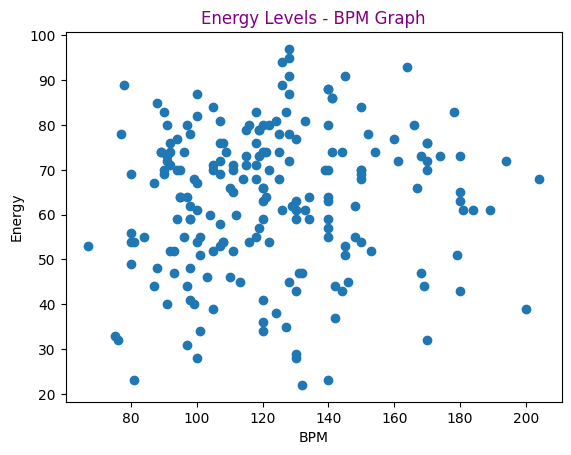

In [ ]:
#draw a graph

plt.scatter(df['bpm'], df['energy'])
plt.xlabel('BPM')
plt.ylabel('Energy')
plt.title('Energy Levels - BPM Graph', color="Purple")
plt.show()

In [ ]:
# Creating the K-Means model

kmeans = KMeans(n_clusters=5)
kmeans.fit(df[['bpm', 'energy']])

# Guess the clusters and add them as a new column

df['cluster'] = kmeans.predict(df[['bpm', 'energy']])

# Print the results

print(df[['bpm', 'energy', 'cluster']])

     bpm  energy  cluster
0    118      68        2
1    120      59        2
2     95      64        1
3    133      81        2
4     98      62        1
..   ...     ...      ...
201  128      87        2
202  140      88        0
203  100      87        2
204  120      80        2
205   95      64        1

[206 rows x 3 columns]


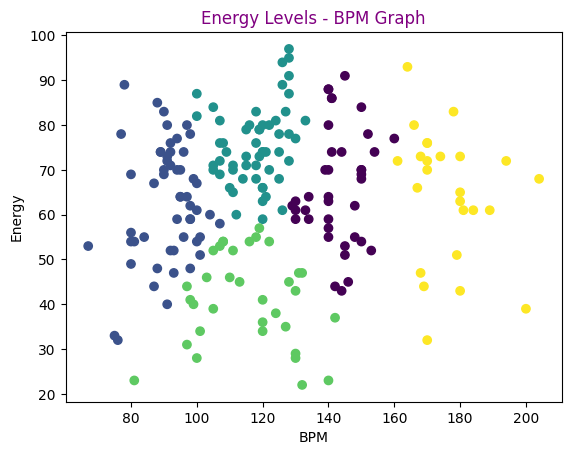

In [ ]:
# draw a cluster graph

plt.scatter(df['bpm'], df['energy'], c=df['cluster'])
plt.xlabel('BPM')
plt.ylabel('Energy')
plt.title('Energy Levels - BPM Graph', color="Purple")
plt.show()

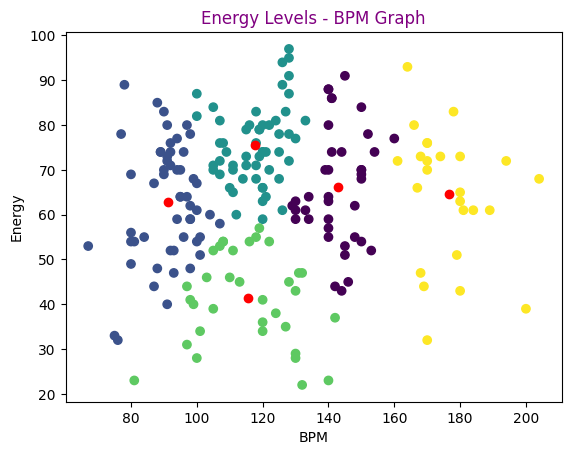

In [ ]:
# draw centroids

plt.scatter(df['bpm'], df['energy'], c=df['cluster'])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red')
plt.xlabel('BPM')
plt.ylabel('Energy')
plt.title('Energy Levels - BPM Graph', color="Purple")
plt.show()

In [ ]:
# test results

score = silhouette_score(df[['bpm', 'energy']], df['cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.3511712609047669


In [ ]:
# find unique clusters

unique_clusters = df['cluster'].unique()

print("Unique Clusters:", unique_clusters)

Unique Clusters: [2 1 3 4 0]


In [ ]:
# Sample data

data = {
    'bpm': [120, 130, 140, 150, 125, 135, 145, 155],
    'energy': [0.80, 0.90, 0.70, 0.60, 0.75, 0.85, 0.65, 0.55],
    'cluster': [2, 0, 3, 1, 2, 0, 4, 1],
    'Energy and BPM Status': ['Medium', 'Very Low', 'High', 'Low', 'Medium', 'Very Low', 'Very High', 'Low']
}
df = pd.DataFrame(data)

# Selecting an sample from each cluster

unique_clusters = df.drop_duplicates(subset='cluster')

# Getting unique BPM and energy values

unique_BPM = unique_clusters['bpm'].tolist()
unique_energy = unique_clusters['energy'].tolist()

# Print results as a side-by-side table

result_df = pd.DataFrame({
    'Unique BPM': unique_BPM,
    'Unique Energy': unique_energy,
    'Cluster': unique_clusters['cluster'].tolist(),
    'Energy and BPM Status': unique_clusters['Energy and BPM Status'].tolist()
})

print(result_df)

   Unique BPM  Unique Energy  Cluster Energy and BPM Status
0         120           0.80        2                Medium
1         130           0.90        0              Very Low
2         140           0.70        3                  High
3         150           0.60        1                   Low
4         145           0.65        4             Very High
